# Derby 2022
Analyze horse racing data to improve the health of the horse and strategy of competition

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


# Loading Data

### File descriptions
* nyra_start_table.csv - horse/jockey race data
* nyra_race_table.csv - racetrack race data
* nyra_tracking_table.csv - tracking data
* nyra_2019_complete.csv - combined table of three above files

In [2]:
# raceData = pd.read_csv('./input/nyra_start_table.csv', parse_dates=['race_date'])
# racetrackData = pd.read_csv('./input/nyra_race_table.csv', parse_dates=['race_date'])
# trackingData = pd.read_csv('./input/nyra_tracking_table.csv', parse_dates=['race_date'])


In [2]:
completeData = pd.read_csv('./input/nyra_2019_complete.csv ', parse_dates=['race_date'], dtype={ 'post_time': str})
completeData.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,00420,120,Andre Shivnarine Worrie,2090


nyra_2019_complete.csv - This file is the combined 3 files into one table. The keys to join them trakus with race - track_id, race_date, race_number. To join trakus with start - track_id, race_date, race_number, program_number.

* track_id - 3 character id for the track the race took place at. 
<blockquote> 
    <ul>
<li>AQU -Aqueduct</li>
<li>BEL - Belmont</li>
<li>SAR - Saratoga</li> 
    </ul>
</blockquote>
* race_date - date the race took place (YYYY-MM-DD)
* race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.
* program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.
* weight_carried - An integer of the weight carried by the horse in the race.
* jockey - Name of the jockey on the horse in the race. 50 character max.
* odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.
* distance_id - Distance of the race in furlongs passed as an integer. Example - 600 would be 6 furlongs.
* course_type - The course the race was run over passed as one character.
<blockquote> 
    <ul>
<li>M - Hurdle</li>
<li> D - Dirt</li>
<li> O - Outer turf</li>
<li> I - Inner turf</li>
<li> T - turf</li> 
    </ul>
</blockquote>
* track_condition - The condition of the course the race was run on passed as three characters. 
<blockquote> 
    <ul>
<li>YL - Yielding</li>
<li> FM - Firm</li>
<li> SY - Sloppy</li>
<li> GD - Good</li>
<li> FT - Fast</li>
<li> MY - Muddy</li>
<li> SF - Soft</li> 
    </ul>
</blockquote>
* run_up_distance - Distance in feet of the gate to the start of the race passed as an integer.
* race_type - The classification of the race passed as as five characters. 
<blockquote> 
    <ul>
<li>STK - Stakes</li>
<li> WCL - Waiver Claiming</li>
<li> WMC - Waiver Maiden Claiming</li>
<li> SST - Starter Stakes</li>
<li> SHP - Starter Handicap</li>
<li> CLM - Claiming</li>
<li> STR - Starter Allowance</li>
<li> AOC - Allowance Optionl Claimer</li>
<li> SOC - Starter Optional Claimer</li>
<li> MCL - Maiden Claiming</li>
<li> ALW - Allowance</li>
<li> MSW - Maiden Special Weight</li> 
    </ul>
</blockquote>
* purse - Purse in US dollars of the race passed as an money with two decimal places.
* post_time - Time of day the race began passed as 5 character. Example - 01220 would be 12:20.
* trakus_index - The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds.
* latitude - The latitude of the horse in the race passed as a float.
* longitude - The longitude of the horse in the race passed as a float.


In [3]:
completeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   track_id         object        
 1   race_date        datetime64[ns]
 2   race_number      int64         
 3   program_number   object        
 4   trakus_index     int64         
 5   latitude         float64       
 6   longitude        float64       
 7   distance_id      int64         
 8   course_type      object        
 9   track_condition  object        
 10  run_up_distance  int64         
 11  race_type        object        
 12  purse            int64         
 13  post_time        object        
 14  weight_carried   int64         
 15  jockey           object        
 16  odds             int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(7)
memory usage: 678.1+ MB


In [4]:
completeData.describe()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,weight_carried,odds
count,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06
mean,5.505409e+00,1.838652e+02,4.120387e+01,-7.377702e+01,7.563151e+02,6.791919e+01,8.887891e+04,1.207133e+02,1.482920e+03
std,2.860656e+00,1.183327e+02,9.771227e-01,4.711054e-02,1.796887e+02,3.892271e+01,1.278240e+05,4.351881e+00,1.952415e+03
min,1.000000e+00,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,0.000000e+00,1.600000e+04,1.100000e+02,0.000000e+00
25%,3.000000e+00,8.800000e+01,4.067346e+01,-7.382883e+01,6.000000e+02,4.500000e+01,4.100000e+04,1.180000e+02,3.350000e+02
50%,6.000000e+00,1.760000e+02,4.071393e+01,-7.376915e+01,8.000000e+02,5.400000e+01,6.200000e+04,1.200000e+02,7.300000e+02
75%,8.000000e+00,2.640000e+02,4.071739e+01,-7.372564e+01,8.500000e+02,8.000000e+01,8.000000e+04,1.220000e+02,1.740000e+03
max,1.300000e+01,1.062000e+03,4.307399e+01,-7.371483e+01,2.000000e+03,2.800000e+02,1.500000e+06,1.600000e+02,1.910000e+04


## Data Preprocessing

In [5]:
completeData.isna().sum()

track_id           0
race_date          0
race_number        0
program_number     0
trakus_index       0
latitude           0
longitude          0
distance_id        0
course_type        0
track_condition    0
run_up_distance    0
race_type          0
purse              0
post_time          0
weight_carried     0
jockey             0
odds               0
dtype: int64

In [6]:
completeData['odds'] = completeData['odds']/100
completeData['post_time'] = completeData['post_time'].apply(lambda x:''.join([x[:3].lstrip("0"), ':', x[3:]]))


In [7]:
completeData.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,4:20,120,Andre Shivnarine Worrie,20.9
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,4:20,120,Andre Shivnarine Worrie,20.9
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,4:20,120,Andre Shivnarine Worrie,20.9
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,4:20,120,Andre Shivnarine Worrie,20.9
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,4:20,120,Andre Shivnarine Worrie,20.9


### Categorical Data

In [8]:
completeData['track_id'] = completeData['track_id'].astype('category')
completeData['course_type'] = completeData['course_type'].astype('category')
completeData['track_condition'] = completeData['track_condition'].astype('category')
completeData['race_type'] = completeData['race_type'].astype('category')

## Data Exploration and Analysis

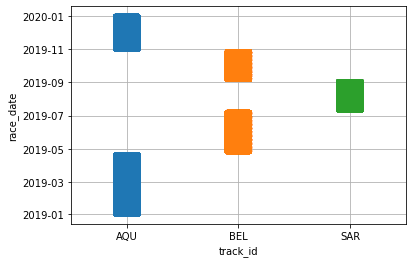

In [21]:
sns.stripplot(x = 'track_id',  y = 'race_date', data = completeData )
plt.grid(True)

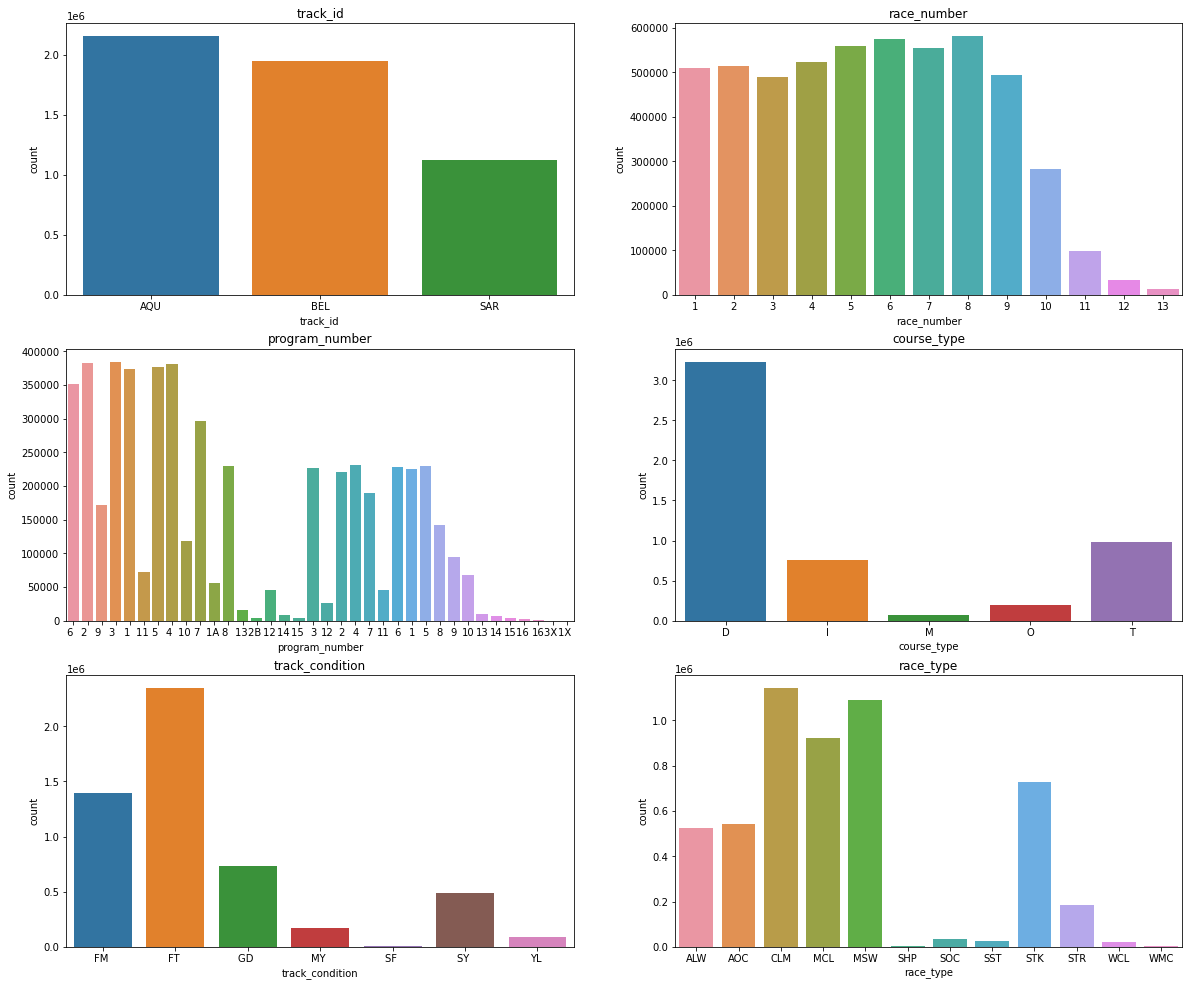

In [11]:
columnsName = ['track_id', 'race_number',  'program_number',
               'course_type', 'track_condition',
               'race_type' ]
plt.figure(figsize=(20, 17))
for i, c in enumerate(columnsName):
    plt.subplot(3, 2, i+1)
    plt.title(columnsName[i])
    sns.countplot(completeData[c])

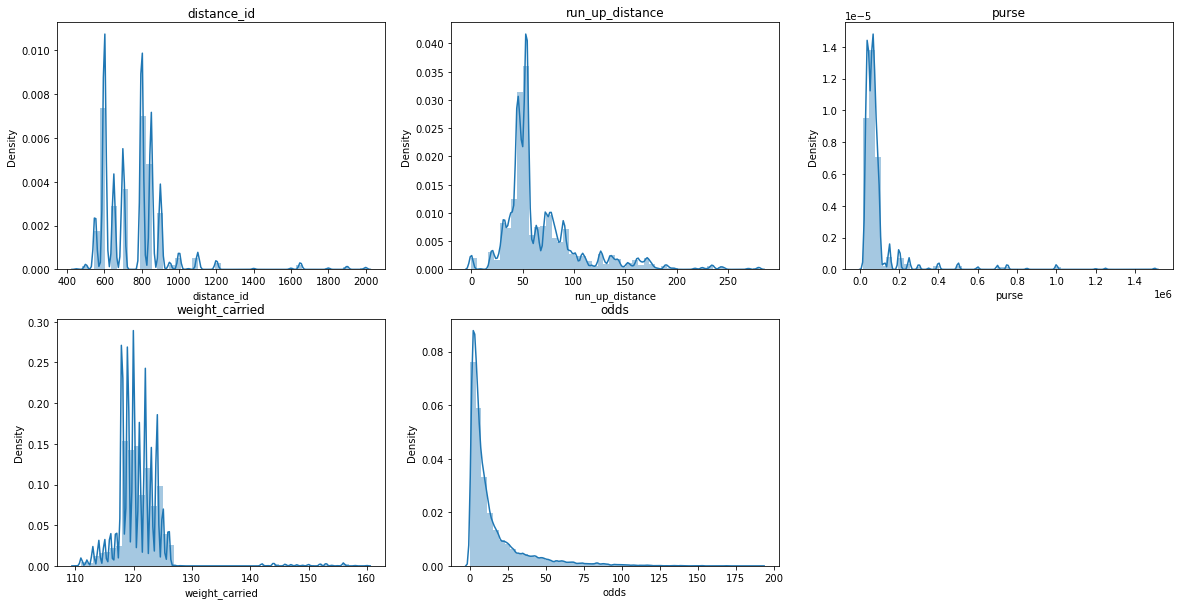

In [22]:
columnsName = ['distance_id',  'run_up_distance', 'purse', 'weight_carried', 'odds']  
plt.figure(figsize=(20, 10))
for i, c in enumerate(columnsName):
    plt.subplot(2, 3, i+1)
    plt.title(columnsName[i])
    sns.distplot(completeData[c])

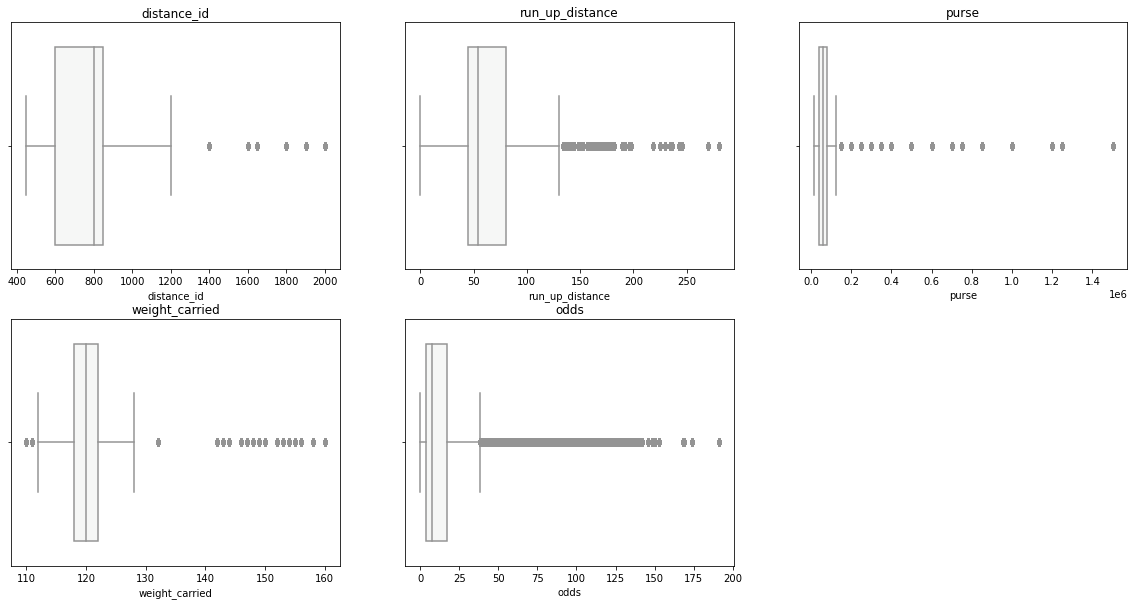

In [23]:
plt.figure(figsize=(20, 10))
for i, c in enumerate(columnsName):
    plt.subplot(2, 3, i+1)
    plt.title(columnsName[i])
    sns.boxplot(completeData[c], palette='PRGn')

### Track visualization

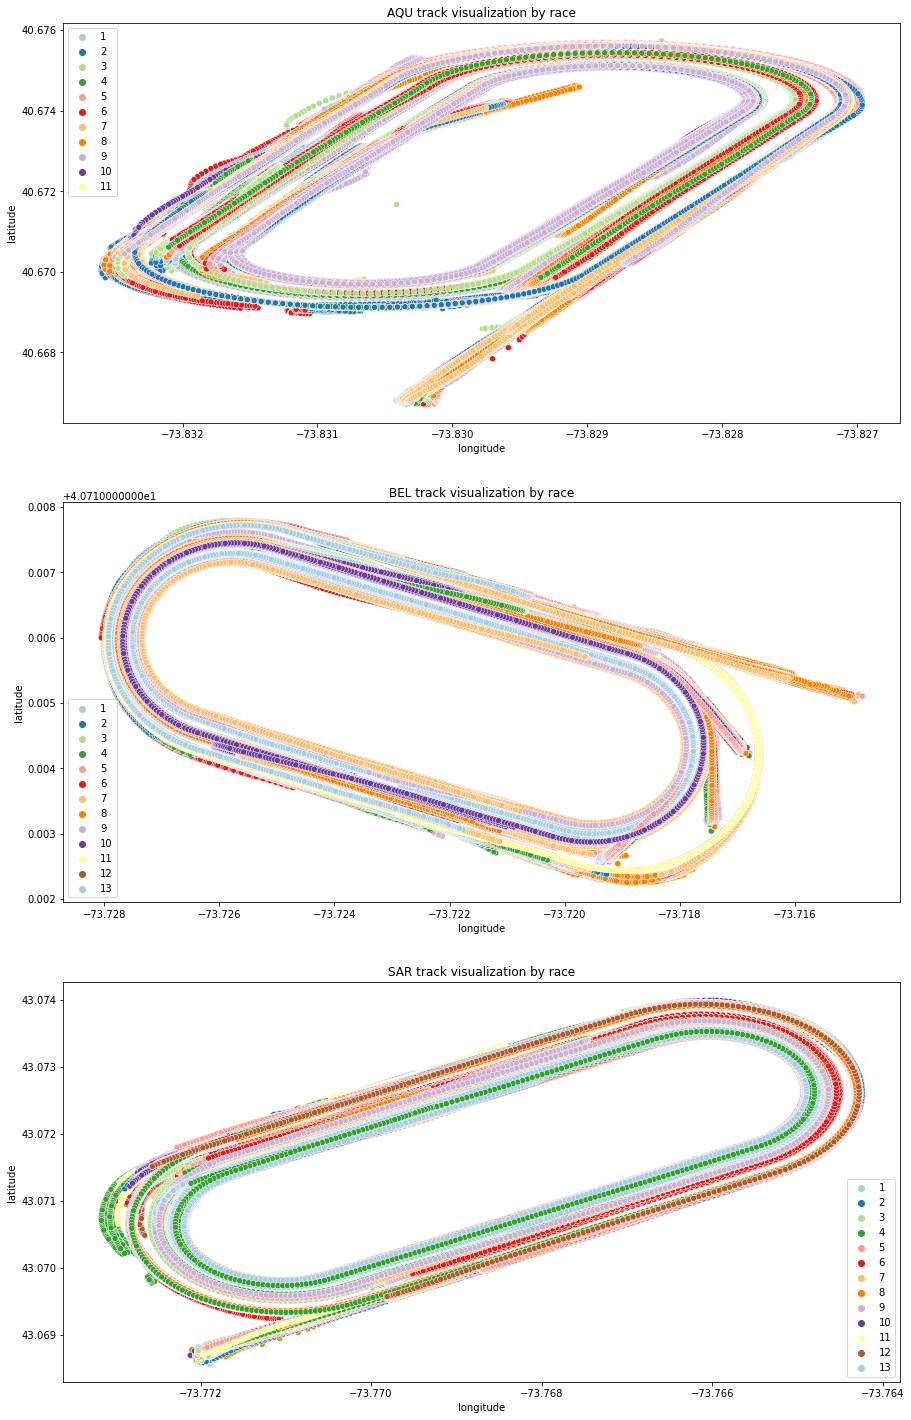

In [24]:
plt.figure(figsize = (15, 25))
for i, trackID in enumerate(completeData['track_id'].unique()):
    plt.subplot(3, 1, i+1)
    sns.scatterplot(data = completeData[completeData['track_id'] == trackID], x = "longitude", y = "latitude", hue = "race_number", palette = "Paired")
    plt.title(f"{trackID} track visualization by race")
    plt.legend()

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

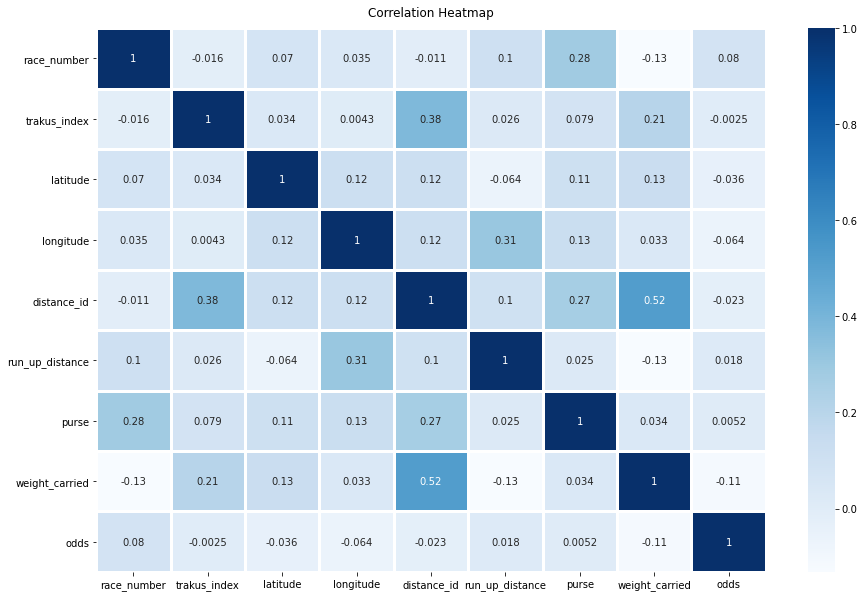

In [25]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(completeData.corr(), cmap = "Blues", annot=True, linewidth=3)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Modeling

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split


features = ['track_id', 'race_number', 'race_date', 'program_number', 'trakus_index',
            'course_type', 'track_condition', 'race_type', 'latitude', 'longitude',
            'distance_id',  'run_up_distance', 'purse', 'weight_carried']

X = completeData[features].copy()
X['track_id'] = X['track_id'].cat.codes.astype(int)
X['course_type'] = X['course_type'].cat.codes.astype(int)
X['track_condition'] = X['track_condition'].cat.codes.astype(int)
X['race_type'] = X['race_type'].cat.codes.astype(int)
X['program_number'] = X['program_number'].astype('category').cat.codes.astype(int)
X['race_date'] = X['race_date'].astype('int64')
y = completeData['odds']
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=50)



### DecisionTreeRegressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree = dtree.fit(X_train, y_train)

In [ ]:
score = dtree.score(X_train, y_train)
print("R-squared:", score) 

In [ ]:
from sklearn.metrics import mean_squared_error

ypred = dtree.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 